# Challenge 1

In this challenge you will be working on **Pokemon**. You will answer a series of questions in order to practice dataframe calculation, aggregation, and transformation.

![Pokemon](../images/pokemon.jpg)

Follow the instructions below and enter your code.

#### Import all required libraries.

In [355]:
import pandas as pd
import numpy as np

#### Import data set.

Read the dataset `pokemon.csv` into a dataframe called `pokemon`.

*Data set attributed to [Alberto Barradas](https://www.kaggle.com/abcsds/pokemon/)*

In [356]:
pokemon = pd.read_csv('/Users/devirughani/Desktop/IronHack/Week_3/Day_2/Labs/lab-dataframe-calculations/your-code/pokemon.csv')

#### Print first 10 rows of `pokemon`.

In [357]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


When you look at a data set, you often wonder what each column means. Some open-source data sets provide descriptions of the data set. In many cases, data descriptions are extremely useful for data analysts to perform work efficiently and successfully.

For the `Pokemon.csv` data set, fortunately, the owner provided descriptions which you can see [here](https://www.kaggle.com/abcsds/pokemon/home). For your convenience, we are including the descriptions below. Read the descriptions and understand what each column means. This knowledge is helpful in your work with the data.

| Column | Description |
| --- | --- |
| # | ID for each pokemon |
| Name | Name of each pokemon |
| Type 1 | Each pokemon has a type, this determines weakness/resistance to attacks |
| Type 2 | Some pokemon are dual type and have 2 |
| Total | A general guide to how strong a pokemon is |
| HP | Hit points, or health, defines how much damage a pokemon can withstand before fainting |
| Attack | The base modifier for normal attacks (eg. Scratch, Punch) |
| Defense | The base damage resistance against normal attacks |
| SP Atk | Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam) |
| SP Def | The base damage resistance against special attacks |
| Speed | Determines which pokemon attacks first each round |
| Generation | Number of generation |
| Legendary | True if Legendary Pokemon False if not |

#### Obtain the distinct values across `Type 1` and `Type 2`.

Exctract all the values in `Type 1` and `Type 2`. Then create an array containing the distinct values across both fields.

In [358]:
type_1_list = list(pokemon['Type 1'])
type_2_list = list(pokemon['Type 2'])

unique_types = np.unique([type_1_list, type_2_list])
unique_types

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'nan'], dtype='<U32')

#### Cleanup `Name` that contain "Mega".

If you have checked out the pokemon names carefully enough, you should have found there are junk texts in the pokemon names which contain "Mega". We want to clean up the pokemon names. For instance, "VenusaurMega Venusaur" should be "Mega Venusaur", and "CharizardMega Charizard X" should be "Mega Charizard X".

In [359]:
def Clean_name(x):
    split = x.split(' ', 1)
    if 'Mega' in split[0]:
        split[0] = 'Mega '
    return " ".join(split)

pokemon['Name'] = pokemon['Name'].apply(Clean_name)

# test transformed data
pokemon.head(50)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [360]:
pokemon['Type 2'].isna()==True

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

#### Create a new column called `A/D Ratio` whose value equals to `Attack` devided by `Defense`.

For instance, if a pokemon has the Attack score 49 and Defense score 49, the corresponding `A/D Ratio` is 49/49=1.

In [361]:
pokemon['A/D Ratio']= pokemon['Attack']/pokemon['Defense']
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302


#### Identify the pokemon with the highest `A/D Ratio`.

In [362]:
pokemon[pokemon['A/D Ratio'] == pokemon['A/D Ratio'].max()]
#pokemon.loc[max(pokemon['A/D Ratio']),'Name']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,9.0


#### Identify the pokemon with the lowest A/D Ratio.

In [363]:
pokemon[pokemon['A/D Ratio'] == pokemon['A/D Ratio'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0.043478


#### Create a new column called `Combo Type` whose value combines `Type 1` and `Type 2`.

Rules:

* If both `Type 1` and `Type 2` have valid values, the `Combo Type` value should contain both values in the form of `<Type 1> <Type 2>`. For example, if `Type 1` value is `Grass` and `Type 2` value is `Poison`, `Combo Type` will be `Grass-Poison`.

* If `Type 1` has valid value but `Type 2` is not, `Combo Type` will be the same as `Type 1`. For example, if `Type 1` is `Fire` whereas `Type 2` is `NaN`, `Combo Type` will be `Fire`.

In [364]:
#pokemon[pokemon['Type 2'].isna()].head()
#[pokemon['Type 2'].isna()]['Type 2'].iloc[0]#
pokemon['Type 2'] = pokemon['Type 2'].fillna("Missing")

In [367]:
def combocol(x,y):
    if (y == "Missing"):
        return x
    else: 
        return x + '-' + y

In [366]:
np.isnan(list(pokemon['Type 2'].unique())[1])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
#pokemon['Type 2'].value_counts(dropna=False)
pokemon['Type 2'].value_counts(dropna=False)

In [ ]:
#pokemon['Type 2'].isnull().values

In [368]:
#pokemon['Combo Type'] = pokemon['Type 1'], pokemon['Type 2'].apply(combocol)
#Apply didn't work because you can only apply this to one column

pokemon['Combo Type']  = list(map(combocol,pokemon['Type 1'],pokemon['Type 2']))

In [369]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio,Combo Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952,Grass-Poison
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008,Grass-Poison
4,4,Charmander,Fire,Missing,309,39,52,43,60,50,65,1,False,1.209302,Fire


#### Identify the pokemon whose `A/D Ratio` are among the top 5.

In [370]:
# your code here

top_pokemon=pokemon.sort_values(by=['A/D Ratio'], ascending=False).head(5)
top_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio,Combo Type
429,386,DeoxysAttack Forme,Psychic,Missing,600,50,180,20,180,20,150,3,True,9.000,Psychic
347,318,Carvanha,Water,Dark,305,45,90,20,65,20,65,3,False,4.500,Water-Dark
19,15,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,3.750,Bug-Poison
453,408,Cranidos,Rock,Missing,350,67,125,40,30,30,58,4,False,3.125,Rock
348,319,Sharpedo,Water,Dark,460,70,120,40,95,40,95,3,False,3.000,Water-Dark


#### For the 5 pokemon printed above, aggregate `Combo Type` and use a list to store the unique values.

Your end product is a list containing the distinct `Combo Type` values of the 5 pokemon with the highest `A/D Ratio`.

In [371]:
top_combo_types=list(top_pokemon['Combo Type'])

unique_top_combo_types=list(np.unique(top_combo_types))

unique_top_combo_types

['Bug-Poison', 'Psychic', 'Rock', 'Water-Dark']

#### For each of the `Combo Type` values obtained from the previous question, calculate the mean scores of all numeric fields across all pokemon.

Your output should look like below:

![Aggregate](../images/aggregated-mean.png)

In [372]:
#Find numerical columns of pokemon and aggregate mean for each col.
#Want to groupby combo type. 

#pokemon.dtypes

aggregations=pokemon.drop(['Name','Type 1','Type 2','Legendary'], axis=1)
aggregations=aggregations.pivot_table(index=['Combo Type'], aggfunc='mean')
aggregations.filter(unique_top_combo_types, axis=0)

# and you can pick one or more aggregations
#superstore.pivot_table(index= ['Category','Region'], values = ['Sales','Profit'], aggfunc = ['sum','mean'])
#superstore.groupby('Ship Mode').agg({'Profit': np.mean ,'Sales':sum}).reset_index()

,#,A/D Ratio,Attack,Defense,Generation,HP,Sp. Atk,Sp. Def,Speed,Total
Combo Type,,,,,,,,,,
Bug-Poison,199.166667,1.315989,68.333333,58.083333,2.333333,53.750000,42.500000,59.333333,65.916667,347.916667
Psychic,381.973684,1.164196,64.947368,67.236842,3.342105,72.552632,98.552632,82.394737,78.868421,464.552632
Rock,410.111111,1.260091,103.333333,107.222222,3.888889,67.111111,40.555556,58.333333,32.888889,409.444444
Water-Dark,347.666667,2.291949,120.000000,65.166667,3.166667,69.166667,88.833333,63.500000,87.166667,493.833333


## Challenge 2: ##

The problem statement is as follows:

You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either Type 1 or Type 2. Which type should you choose in order to maximize your chance of receiving a good Pokemon?


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [373]:
abilities = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

#For comparison
pokemon['New_Total']=pokemon[abilities].sum(axis=1)

pokemon.head(10)

#Hypothesis:
#hypothesis=pokemon['Total']==pokemon['New_Total']
#hypothesis.unique()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio,Combo Type,New_Total
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000,Grass-Poison,318
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127,Grass-Poison,405
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952,Grass-Poison,525
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008,Grass-Poison,625
4,4,Charmander,Fire,Missing,309,39,52,43,60,50,65,1,False,1.209302,Fire,309
5,5,Charmeleon,Fire,Missing,405,58,64,58,80,65,80,1,False,1.103448,Fire,405
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,1.076923,Fire-Flying,534
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,1.171171,Fire-Dragon,634
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,1.333333,Fire-Flying,634
9,7,Squirtle,Water,Missing,314,44,48,65,50,64,43,1,False,0.738462,Water,314


## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [410]:
from sklearn.preprocessing import OneHotEncoder


pokemon_type1 = pokemon[['Type 1']]
pokemon_type2 = pokemon[['Type 2']]

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(pokemon_type1)

onehot_type1 = encoder.transform(pokemon_type1).toarray()
onehot_type2 = encoder.transform(pokemon_type2).toarray()


types_ohe = onehot_type1 + onehot_type2
pokemon_types_encoded = pd.DataFrame(types_ohe,columns = encoder.categories_).astype(int)
pokemon_types_encoded

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#types_for_ohe=pokemon[['Type 1', 'Type 2']]


#def OneHotColumn(categorical_for_ohe_column):
   # encoder = OneHotEncoder(handle_unknown='ignore')
    #encoder = encoder.fit(categorical_for_ohe_column)
   # onehot_encoded = encoder.transform(categorical_for_ohe_column).toarray()
    #return pd.DataFrame(onehot_encoded,columns = encoder.categories_)


#types_concat_ohe = pd.DataFrame()

#for col in types_for_ohe.columns:
   # categorical_onehot_encoded = OneHotColumn(types_for_ohe[[col]])
    #types_concat_ohe = pd.concat([types_concat_ohe,categorical_onehot_encoded], axis=1)

#types_concat_ohe=types_concat_ohe.drop(['Missing'], axis=1)
#types_concat_ohe=types_concat_ohe.T.drop_duplicates().T
#display(types_concat_ohe)


#### Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between Total and the encoded fields. Our expectation is:

There are relationships between Total and the encoded pokemon type variables and we need to identify the correlations.
The information we need to collect is:

How to identify the relationship between Total and the encoded pokemon type fields?
There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of Total to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest Total.

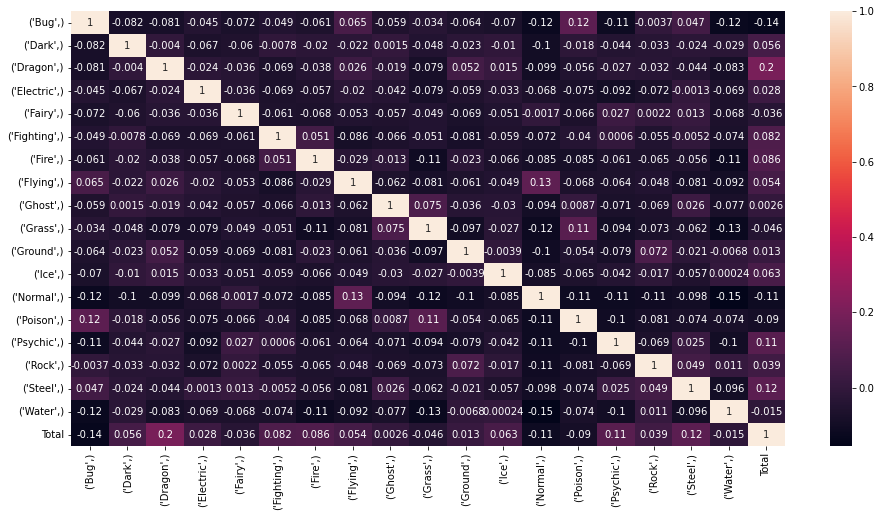

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import spearmanr

total=pokemon[['Total']]

pokemon_new = pd.concat([pokemon_types_encoded,total], axis=1)

pokemon_new

corr_matrix= pokemon_new.corr(method ='spearman')
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#Dragon is the most likely to have the highest total as it appears to be most correlated here.

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

# Challenge 3

In this challenge we will work on the `Orders` data set. In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

## Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

Next, extract and import `Orders` dataset into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [419]:
orders = pd.read_csv('/Users/devirughani/Desktop/IronHack/Week_3/Day_2/Labs/lab-dataframe-calculations/your-code/Orders.csv', index_col = False)

orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?

We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

In [420]:
aggregated_amount   = orders.groupby(['CustomerID']).agg({'amount_spent':sum}).reset_index()

In [421]:
labels = ["Normal","Preferred", "VIP"]
aggregated_amount['Customer Type'] = pd.cut(aggregated_amount['amount_spent'],[0, aggregated_amount['amount_spent'].quantile(0.75),aggregated_amount['amount_spent'].quantile(0.95), aggregated_amount['amount_spent'].quantile(1)], labels = labels)
aggregated_amount['Customer Type'].value_counts(dropna=False)

aggregated_amount.sort_values(by=['amount_spent'], ascending=False).head(5)

,CustomerID,amount_spent,Customer Type
1690,14646,280206.02,VIP
4202,18102,259657.30,VIP
3729,17450,194550.79,VIP
3009,16446,168472.50,VIP
1880,14911,143825.06,VIP


In [422]:
#For future here is a more sophisticated solution from classmate:
#orders_agg = orders[['CustomerID','amount_spent']]
#orders_agg = orders_agg.groupby('CustomerID')['amount_spent'].agg(total_spent=sum).reset_index()

#def Client_type(row):
 #   if row.total_spent > orders_agg.total_spent.quantile(.95):
      #  type_c = "VIP"
  #  elif row.total_spent > orders_agg.total_spent.quantile(.75):
      #  type_c = "Preferred"
   # else:
       # type_c = "-"
    #return type_c

#orders_agg['Client_type'] = orders_agg.apply(Client_type, axis=1)
#orders_agg.sort_values(by=['total_spent'], ascending=False).head(5)

## Q2: How to identify which country has the most VIP Customers?

In [423]:
#End goal: Table with Country grouped, 
#and a count of VIP, Preferred and Normal customers (count) of customer ID's.


aggregated_amount_and_country=orders.groupby(['CustomerID', 'Country']).agg({'amount_spent':sum}).sort_values(by=['amount_spent'], ascending=False).reset_index()
labels = ["Normal","Preferred", "VIP"]

aggregated_amount_and_country['Customer Type'] = pd.cut(aggregated_amount_and_country['amount_spent'],[0, aggregated_amount_and_country['amount_spent'].quantile(0.75),aggregated_amount_and_country['amount_spent'].quantile(0.95), aggregated_amount_and_country['amount_spent'].quantile(1)], labels = labels)
aggregated_amount_and_country['Customer Type'].value_counts(dropna=False)

customers_by_country_and_type = aggregated_amount_and_country.groupby(['Country','Customer Type']).agg({'CustomerID':pd.Series.nunique}).reset_index().rename(columns={"CustomerID":"Number_of_customers"}).pivot_table(index='Country',columns='Customer Type')
for col in customers_by_country_and_type.columns:
    customers_by_country_and_type[col] = customers_by_country_and_type[col].fillna(0)
customers_by_country_and_type=customers_by_country_and_type.droplevel('Customer Type', axis=1).reset_index()

#customers_by_country_and_type.rename(columns={1:"Normal", 2:"Preferred", 3:"VIP"})
customers_by_country_and_type=customers_by_country_and_type.set_axis(['Country','Normal','Preferred', 'VIP'], axis=1)
customers_by_country_and_type

,Country,Normal,Preferred,VIP
0,Australia,5.0,3.0,1.0
1,Austria,10.0,1.0,0.0
2,Bahrain,2.0,0.0,0.0
3,Belgium,14.0,11.0,0.0
4,Brazil,1.0,0.0,0.0
5,Canada,3.0,1.0,0.0
6,Channel Islands,5.0,3.0,1.0
7,Cyprus,5.0,2.0,1.0
8,Czech Republic,1.0,0.0,0.0
9,Denmark,6.0,2.0,1.0


## Q3: How to identify which country has the most VIP+Preferred Customers combined?

In [424]:
customers_by_country_and_type['VIP+Preferred']=customers_by_country_and_type['VIP']+customers_by_country_and_type['Preferred']
customers_by_country_and_type
customers_by_country_and_type[customers_by_country_and_type['VIP+Preferred'] ==customers_by_country_and_type['VIP+Preferred'].max()]

,Country,Normal,Preferred,VIP,VIP+Preferred
35,United Kingdom,2986.0,756.0,178.0,934.0
